**loading data**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/data/daily-min-temperatures.csv",header=0,parse_dates=[0])

In [ ]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


**applied to only series without trend and seasonality
means first remove trend and seasonality if it is present**

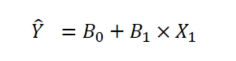

auto regression is basically a linear regression

it tries to fit a straight line

why saying auto ? ->  regression model uses the same input variables at previous time steps
like t-1 t-2 thats why it is
referred to as auto regression -> regression of itself

**auto regression means -> regression on the lagged values**

## **Auto regression model**

In [ ]:
train=df.Temp[:df.shape[0]-7]

In [ ]:
test=df.Temp[df.shape[0]-7:]

In [ ]:
train.head()

,Temp
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [ ]:
test.head()

,Temp
3643,12.9
3644,14.6
3645,14.0
3646,13.6
3647,13.5


In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
model = AutoReg(train, lags=15 ,old_names=False)   # you can adjust the number of lags
model


**(AIC, BIC) ka use karke optimal lag order nikalna padta hai.**

**AIC**

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

best_aic = np.inf
best_lag = None
best_model = None

# Try lag values from 1 to, say, 50
for lag in range(1, 30):
    try:
        model = AutoReg(train, lags=lag, old_names=False)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_lag = lag
            best_model = model_fit
    except Exception as e:
        continue

print("Best lag length:", best_lag)
print("Best AIC:", best_aic)


Best lag length: 29
Best AIC: 16633.077926235474


**BIC**

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

best_bic = np.inf
best_lag = None
best_model = None

# Try lag values from 1 to, say, 30
for lag in range(1, 30):
    try:
        model = AutoReg(train, lags=lag, old_names=False)
        model_fit = model.fit()
        if model_fit.bic < best_bic:
            best_bic = model_fit.bic
            best_lag = lag
            best_model = model_fit
    except Exception:
        continue

print("Best lag length (BIC):", best_lag)
print("Best BIC:", best_bic)


Best lag length (BIC): 22
Best BIC: 16802.62159359106


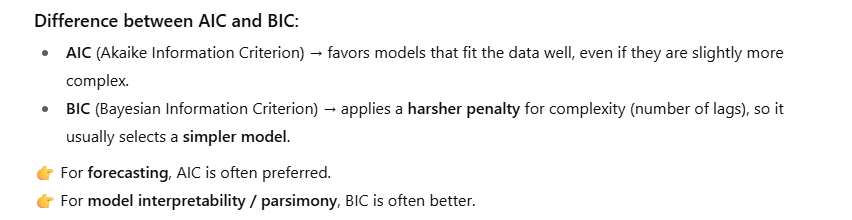

In [ ]:
model = AutoReg(train, lags=29 ,old_names=False)  # 29 got it through aic
model

In [ ]:
model_fit=model.fit()
model_fit

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3643
Model:                    AutoReg(29)   Log Likelihood               -8285.539
Method:               Conditional MLE   S.D. of innovations              2.396
Date:                Fri, 19 Sep 2025   AIC                          16633.078
Time:                        07:15:39   BIC                          16825.048
Sample:                            29   HQIC                         16701.478
                                 3643                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5598      0.149      3.766      0.000       0.268       0.851
Temp.L1        0.5887      0.017     35.375      0.000       0.556       0.621
Temp.L2       -0.0908      0.019     -4.703      0.000      -0.129      -0.053
Temp.L3        0.0482      0.019      2.487      0.013       0.010       0.086
Temp.L4        0.0400      0.019      2.063      0.039       0.002       0.078
Temp.L5        0.0394      0.019      2.030      0.042       0.001       0.077
Temp.L6        0.0259      0.019      1.337      0.181      -0.012       0.064
Temp.L7        0.0447      0.019      2.301      0.021       0.007       0.083
Temp.L8        0.0131      0.019      0.677      0.498      -0.025       0.051
Temp.L9        0.0371      0.019      1.914      0.056      -0.001       0.075
Temp.L10      -0.0006      0.019     -0.033      0.974      -0.039       0.037
Temp.L11       0.0049      0.019      0.255      0.799      -0.033       0.043
Temp.L12       0.0180      0.019      0.930      0.352      -0.020       0.056
Temp.L13       0.0270      0.019      1.391      0.164      -0.011       0.065
Temp.L14       0.0006      0.019      0.032      0.974      -0.037       0.039
Temp.L15       0.0245      0.019      1.263      0.207      -0.014       0.062
Temp.L16       0.0074      0.019      0.380      0.704      -0.031       0.045
Temp.L17       0.0099      0.019      0.512      0.608      -0.028       0.048
Temp.L18       0.0344      0.019      1.775      0.076      -0.004       0.072
Temp.L19      -0.0091      0.019     -0.469      0.639      -0.047       0.029
Temp.L20       0.0242      0.019      1.247      0.213      -0.014       0.062
Temp.L21       0.0186      0.019      0.958      0.338      -0.019       0.057
Temp.L22       0.0123      0.019      0.635      0.526      -0.026       0.050
Temp.L23      -0.0185      0.019     -0.956      0.339      -0.056       0.019
Temp.L24      -0.0017      0.019     -0.089      0.929      -0.040       0.036
Temp.L25       0.0167      0.019      0.864      0.388      -0.021       0.055
Temp.L26       0.0200      0.019      1.033      0.302      -0.018       0.058
Temp.L27       0.0096      0.019      0.499      0.618      -0.028       0.047
Temp.L28       0.0064      0.019      0.330      0.741      -0.031       0.044
Temp.L29      -0.0016      0.017     -0.094      0.925      -0.034       0.031
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0086           -0.0000j            1.0086           -0.0000
AR.2             1.0822           -0.2720j            1.1159           -0.0392
AR.3             1.0822           +0.2720j            1.1159            0.0392
AR.4             1.0239           -0.4949j            1.1372           -0.0717
AR

**how many lag values are coming out to be important in our model**

**no of lag variables**

In [ ]:
# Number of lags used
print("Number of lags:", len(model_fit.ar_lags))



Number of lags: 29


In [ ]:


# Coefficients
print("Coefficients:", model_fit.params)

Coefficients: const       0.559773
Temp.L1     0.588662
Temp.L2    -0.090812
Temp.L3     0.048164
Temp.L4     0.039991
Temp.L5     0.039368
Temp.L6     0.025947
Temp.L7     0.044675
Temp.L8     0.013143
Temp.L9     0.037145
Temp.L10   -0.000641
Temp.L11    0.004939
Temp.L12    0.018024
Temp.L13    0.026961
Temp.L14    0.000623
Temp.L15    0.024457
Temp.L16    0.007353
Temp.L17    0.009925
Temp.L18    0.034385
Temp.L19   -0.009096
Temp.L20    0.024165
Temp.L21    0.018566
Temp.L22    0.012295
Temp.L23   -0.018518
Temp.L24   -0.001717
Temp.L25    0.016713
Temp.L26    0.019966
Temp.L27    0.009631
Temp.L28    0.006363
Temp.L29   -0.001566
dtype: float64


In [ ]:
prediction=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
prediction

,0
3643,11.872160
3644,13.055704
3645,13.531810
3646,13.242590
3647,13.091564
3648,13.146082
3649,13.176492


In [ ]:
prediction.iloc[0]

np.float64(11.87216020967234)

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,prediction)
mse

1.5012452323028211

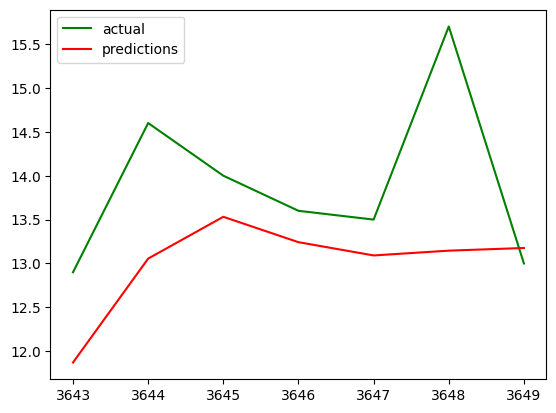

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test,color="green",label="actual")
plt.plot(prediction,color="red",label="predictions")
plt.legend()
plt.show()

In [ ]:
import numpy
import pandas
import sklearn
import statsmodels
import sys
print("python:",sys.version)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("scikit-learn:", sklearn.__version__)
print("statsmodels:", statsmodels.__version__)


python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
numpy: 2.0.2
pandas: 2.2.2
scikit-learn: 1.6.1
statsmodels: 0.14.5
